# What is Linear Regression
- In simple terms, linear regression is a method of `finding the best straight line fitting to the given data`, i.e. finding the best linear relationship between the independent and dependent variables.
- In technical terms, linear regression is a machine learning algorithm that finds the best linear-fit relationship on any given data, between independent and dependent variables. It is mostly done by the Sum of Squared Residuals Method.

# Types of Linear Regression

- `Simple Linear Regression`:
    - If a single independent variable is used to predict the value of a numerical dependent variable, then such a 
       Linear Regression algorithm is called Simple Linear Regression.
- `Multiple Linear regression`:
    - If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.


# Mathematical Intution behind Liner Regression

- As we know line equation is: $y = mX+c$
    
    where:
    - $y$ = Dependent variable
    - $m$ = Slope of a line
    - $X$ = Independent vairable
    - $c$ = Intercept 
- for liner regression: $y = \omega_0+\omega_1x_1+\omega_2x_2+.....\omega_nx_n$
    - $\omega_{1\to n}$ = Slope of a line for 1 to n features
    - $\omega_0$ = Intercept 


# What are important libraries to load

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML related libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# for Linear Model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Example for `Simple Linear Regression`

## Salary Data Set

In [256]:
df = pd.read_csv("Salary_Data.csv")

In [257]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [267]:
df.shape

(30, 2)

In [258]:
X = df.YearsExperience
y = df.Salary

In [259]:
X.shape

(30,)

In [260]:
y.shape

(30,)

## Line plot for Experience V/s Salary

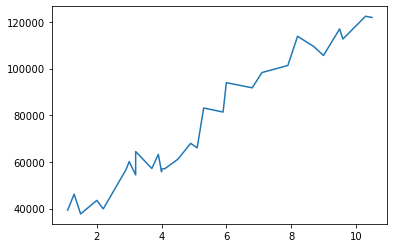

In [268]:
plt.plot(X,y)

## Scatter plot for Experience V/s Salary

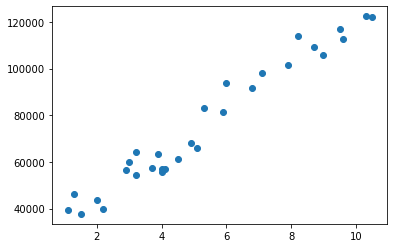

In [269]:
plt.scatter(X,y)

## Converting Single dimension data to 2-Dimensional data

In [264]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

In [265]:
X.shape

(30, 1)

In [266]:
y.shape

(30, 1)

## Creating Train and Test data from raw data

In [270]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [272]:
X_train.shape

(24, 1)

In [273]:
X_train

,YearsExperience
13,4.1
27,9.6
12,4.0
1,1.3
19,6.0
14,4.5
18,5.9
6,3.0
11,4.0
23,8.2


In [275]:
X_test

,YearsExperience
20,6.8
7,3.2
5,2.9
2,1.5
3,2.0
21,7.1


In [276]:
X_test.shape

(6, 1)

In [278]:
y_test

,Salary
20,91738.0
7,54445.0
5,56642.0
2,37731.0
3,43525.0
21,98273.0


In [277]:
y_test.shape

(6, 1)

## Creating an Object from LinearRegression Function

In [279]:
lr = LinearRegression()

In [280]:
lr

LinearRegression()

In [282]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [283]:
lr.normalize

False

## Fitting data into LinearRegression object to have best fit line

In [284]:
lr.fit(X_train,y_train)

LinearRegression()

## Predicting salary for given number of year of experience from test data

In [286]:
y_pred = lr.predict(X_test)
y_pred

array([[89715.76498848],
       [56031.05821174],
       [53223.99931368],
       [40124.39112273],
       [44802.8226195 ],
       [92522.82388655]])

## Plotting Predicted Salary and Actual Value

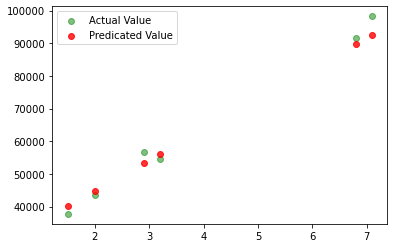

In [292]:
plt.scatter(X_test,y_test,color="g",alpha=.5,label="Actual Value")
plt.scatter(X_test,y_pred,color="r",alpha=.8,label="Predicated Value")
plt.legend()
plt.show()

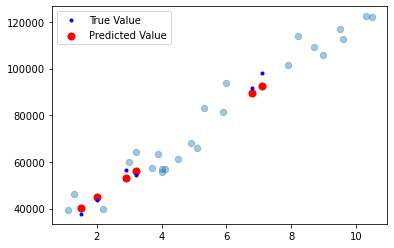

In [295]:
plt.scatter(X_train,y_train,s=40,alpha=.4)
plt.plot(X_test,y_test,".b",label="True Value")
plt.scatter(X_test,y_pred,s=50,color="r",label="Predicted Value")
# plt.scatter(X_train,lr.predict(X_train),s=50,color="k")\
plt.legend()
plt.show()

## Plotting Rgression line for Predicted Salary and Actual Value

/Users/pksoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


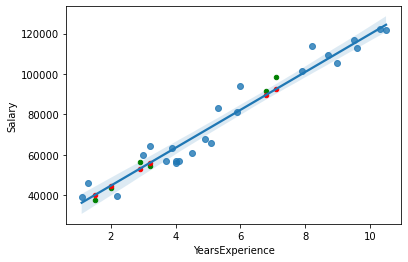

In [296]:
sns.regplot(X_train,y_train)
plt.scatter(X_test,y_test,s=20,color="g")
plt.scatter(X_test,y_pred,s=20,color="r")

## KDE plot for True Vs Predicted Values

In [302]:
y_test.Salary

20    91738.0
7     54445.0
5     56642.0
2     37731.0
3     43525.0
21    98273.0
Name: Salary, dtype: float64

In [317]:
y_pred_df = pd.DataFrame(y_pred.tolist())
y_pred_df

,0
0,89715.764988
1,56031.058212
2,53223.999314
3,40124.391123
4,44802.822619
5,92522.823887


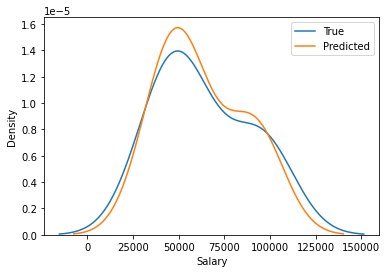

In [320]:
sns.kdeplot(y_test.Salary,label="True")
sns.kdeplot(y_pred_df[0],label="Predicted")
plt.legend()
plt.show()

## How to Evaluate Linear regression model
- R Square/Adjusted R Square: ` It provides an indication of goodness of fit `
- Mean Square Error(MSE)/Root Mean Square Error(RMSE)
- Mean Absolute Error(MAE)

In [321]:
r2_score(y_test,y_pred)

0.9816423482070253

In [322]:
mean_absolute_error(y_test,y_pred)

2741.2806275420785

In [323]:
mean_squared_error(y_test,y_pred)

9785570.138914311

# Interview Questions

Best source:
    - https://www.upgrad.com/blog/machine-learning-interview-questions-answers-ii/

## Must know this:    

### What is Residuals
- The distance between the actual value and predicted values is called residual. If the observed points are far from the regression line, then the residual will be high, and so cost function will high. If the scatter points are close to the regression line, then the residual will be small and hence the cost function. 

### What is cost function

$\frac{1}{N}\sum_{i=1}^{N}(y_i-y'_i)$
- where: 
    - $y$ is True value
    - $y'$ is predicted value , can also be written as $\omega_0+\omega_ix_i$

### what is bias and variance 

### what is Under fitting model

### what is Over fitting model

### How to solve Under & Over fitting model

### What is Ridge Regression

### What is Lasso Regression